### Model

In [ ]:
# you should connect to a GPU 
! pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=725c9d3a105d179898349bfea349e4a0f866a6e94e41cd827f2e2d616f057f9a
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [ ]:
!apt update
!apt install -y cmake
!pip install dlib

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.com/ubuntu 

In [ ]:
# change the paths of the images

from google.colab import drive
drive.mount('/content/drive')

train_imgs_path = '/content/drive/MyDrive/imgs'   
test_imgs_path = '/content/drive/MyDrive/test_faces'

Mounted at /content/drive


In [ ]:
import os
import face_recognition as frec
import cv2 
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## read some  images to train and know their labels
# path => of the folder that contain the images

imgs_list = []
names_list = []
imgs_name = os.listdir(train_imgs_path)

for img_name in imgs_name:
  img = cv2.imread(f'{train_imgs_path}/{img_name}')
  imgs_list.append(img)
  names_list.append(img_name.split('.')[0])

In [ ]:
znames_list
# حذيفه
# عمر
# دميان
# اروي

['دميان رفيق', 'عمر مصطفي', 'حذيفه زكي', 'اروي عصام']

In [ ]:
## Encoding train imgs

def Encoding(imges):
  encod_list =[]
  for img in imgs_list:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    encod = frec.face_encodings(img)[0]
    encod_list.append(encod)
  return encod_list

encoded_list = Encoding(imgs_list)

0.027429918488764377 دميان رفيق


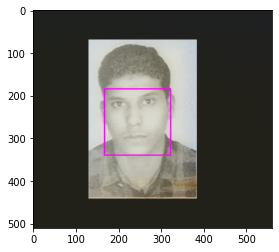

0.06536781194960788 عمر مصطفي


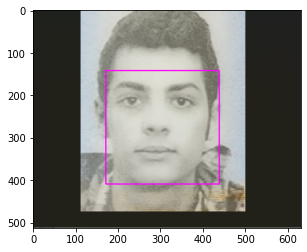

0.39005233667420885 حذيفه زكي


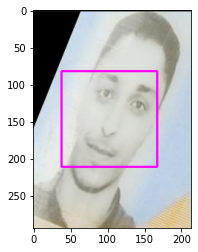

UNKNOWN


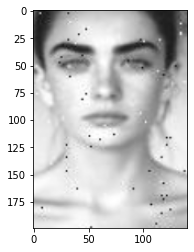

In [ ]:
## face recognition
# picture from object detection model



test_imgs_name = os.listdir(test_imgs_path)
for test_img in test_imgs_name:

  img = frec.load_image_file(test_imgs_path + '/'+test_img)
  face_loc = frec.face_locations(img)
  newimg_encod = frec.face_encodings(img,face_loc)

  
  for i,encoded_img in enumerate(encoded_list):
    matches = frec.compare_faces(encoded_img,newimg_encod)
    distance = frec.face_distance(encoded_img,newimg_encod)

    if matches[0]:
      print(distance[0],names_list[i])
      loc=[]
      loc = frec.face_locations(img)[0]
      cv2.rectangle(img,(loc[3],loc[0]),(loc[1],loc[2]),(255,0,255),2)
      plt.imshow(img)
      plt.show()
      break
      
  else:
    print('UNKNOWN')
    plt.imshow(img)
    plt.show()
